In [42]:
# Tema: Clustering with K-means
# Capacitador: Ebson David Allende Quintana
# Versión: 1.0
# email: david.allende@outlook.com

# Liberias necesarias

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats.stats import pearsonr  
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist


## K-Means Clustering

La data de los diferentes paises del mundo tiene como variables los siguientes indicadores.
<table><tr><th>country</th><td>Nombre del país</td></tr>
<tr><th>region</th><td>Continente al que pertenece</td></tr>
<tr><th>tfr</th><td>Ratio de fertilidad</td></tr>
<tr><th>contraception</th><td>% de la población que usa anticonceptivos</td></tr>
<tr><th>educationMale</th><td>% de la población masculina educada</td></tr>
<tr><th>educationFemale</th><td>% de la población femenina educada</td></tr>
<tr><th>lifeMale</th><td>Esperanza de vida de los hombres</td></tr>
<tr><th>lifeFemale</th><td>Esperanza de vida de las mujeres</td></tr>
<tr><th>infantMortality</th><td>Ratio de mortalidad infantil</td></tr>
<tr><th>GDPperCapita</th><td>PBI</td></tr>
<tr><th>economicActivityMale</th><td>Hombres en la PEA</td></tr>
<tr><th>economicActivityFemale</th><td>Mujeres en la PEA</td></tr>
<tr><th>illiteracyMale</th><td>Ratio de analfabetismo en hombres</td></tr>
<tr><th>illiteracyFemale</th><td>Ratio de analfabetismo en mujeres</td></tr>
</table>

In [14]:
df = pd.read_csv('./Data/UN.csv')

print('----')

print('Individual columns - Python data types')
[(col, type(df[col][0])) for col in df.columns] 

----
Individual columns - Python data types


[('country', str),
 ('region', str),
 ('tfr', numpy.float64),
 ('contraception', numpy.float64),
 ('educationMale', numpy.float64),
 ('educationFemale', numpy.float64),
 ('lifeMale', numpy.float64),
 ('lifeFemale', numpy.float64),
 ('infantMortality', numpy.float64),
 ('GDPperCapita', numpy.float64),
 ('economicActivityMale', numpy.float64),
 ('economicActivityFemale', numpy.float64),
 ('illiteracyMale', numpy.float64),
 ('illiteracyFemale', numpy.float64)]

% de missings por variables

In [16]:
print('Percentage of the values complete in the columns')
df.count(0)/df.shape[0] * 100

Percentage of the values complete in the columns


country                   100.000000
region                    100.000000
tfr                        95.169082
contraception              69.565217
educationMale              36.714976
educationFemale            36.714976
lifeMale                   94.685990
lifeFemale                 94.685990
infantMortality            97.101449
GDPperCapita               95.169082
economicActivityMale       79.710145
economicActivityFemale     79.710145
illiteracyMale             77.294686
illiteracyFemale           77.294686
dtype: float64

La esperanza de vida, la mortalidad infantil y el PBI son las variables que tienen mayor cantidad información completa. Por ello las vamos a considerar en modelo de segmentación.

In [17]:
df = df[['lifeMale', 'lifeFemale', 'infantMortality', 'GDPperCapita']]

df = df.dropna(how='any')

In [25]:
print (df[:10])

    lifeMale  lifeFemale  infantMortality  GDPperCapita
0       45.0        46.0            154.0        2848.0
1       68.0        74.0             32.0         863.0
2       67.5        70.3             44.0        1531.0
5       44.9        48.1            124.0         355.0
7       69.6        76.8             22.0        8055.0
8       67.2        74.0             25.0         354.0
9       75.4        81.2              6.0       20046.0
10      73.7        80.1              6.0       29006.0
11      66.5        74.5             33.0         321.0
12      70.5        77.1             14.0       12545.0


### Para determinar el número de clusters

Nos da una idea de la cantidad de clusters que nos permitirán segmentar nuestros datos.

In [24]:
K = range(1,10)

# scipy.cluster.vq.kmeans
k_clusters = [kmeans(df.values,k) for k in K] # apply kmeans 1 to 10
k_clusters[:3]

[(array([[   63.52606383,    68.30904255,    44.30851064,  5890.59574468]]),
  6534.9809626620172),
 (array([[  6.12227273e+01,   6.57779221e+01,   5.23831169e+01,
            2.19273377e+03],
         [  7.39588235e+01,   7.97735294e+01,   7.73529412e+00,
            2.26397353e+04]]), 2707.2294867471232),
 (array([[  7.18862069e+01,   7.75551724e+01,   1.37931034e+01,
            1.20441034e+04],
         [  7.43050000e+01,   8.02350000e+01,   6.60000000e+00,
            2.76644500e+04],
         [  6.02309353e+01,   6.46640288e+01,   5.61007194e+01,
            1.47384173e+03]]), 1874.0284870915732)]

Validaremos un rango de 10 clusters, calculamos los centroides y la distorsión de los centroides y los valores observados asociados a cada cluster.

In [30]:
euclidean_centroid = [cdist(df.values, centroid, 'euclidean') for (centroid,var) in k_clusters]
print ('-----with 1 cluster------')
print (euclidean_centroid[0][:5])

print ('-----with 2 cluster------')
print (euclidean_centroid[1][:5])

print ('-----with 3 cluster------')
print (euclidean_centroid[2][:5])

-----with 1 cluster------
[[ 3044.71049474]
 [ 5027.61602297]
 [ 4359.59802141]
 [ 5536.23755972]
 [ 2164.54439528]]
-----with 2 cluster------
[[   663.5918709   19792.32574968]
 [  1329.9326654   21776.75039319]
 [   661.83208396  21108.76955936]
 [  1839.28608809  22285.08003662]
 [  5862.36131557  14584.74322443]]
-----with 3 cluster------
[[  9197.26563726  24816.92866131   1377.85179058]
 [ 11181.11951255  26801.46350278    611.43763245]
 [ 10513.15026275  26133.47953631     59.14473012]
 [ 11689.6912212   27309.73707993   1121.12734609]
 [  3989.11261701  19609.45691239   6581.26447877]]


Tomaremos los centroides de cada grupo de clusters y calculamos la distancia euclediana de todos los casos a los centroides de cada cluster.

In [31]:
distance = [np.min(D,axis=1) for D in euclidean_centroid]
print ('-----with 1st cluster------')
print (distance[0][:5])
print ('-----with 2nd cluster------')
print (distance[1][:5])

-----with 1st cluster------
[ 3044.71049474  5027.61602297  4359.59802141  5536.23755972  2164.54439528]
-----with 2nd cluster------
[  663.5918709   1329.9326654    661.83208396  1839.28608809  5862.36131557]


Calculamos la suma de los cuadrados de la distancia

In [32]:
avgWithinSumSquare = [sum(d)/df.values.shape[0] for d in distance]
avgWithinSumSquare

[6534.9809626620136,
 2790.2101193300132,
 1890.9166153060164,
 1438.7793254224125,
 1122.2625658294346,
 906.14109679444778,
 744.12209247996577,
 645.91915410445336,
 604.37878538964185]

Gráfica que nos permite determinar el número de clusters apropiados para la segmentación

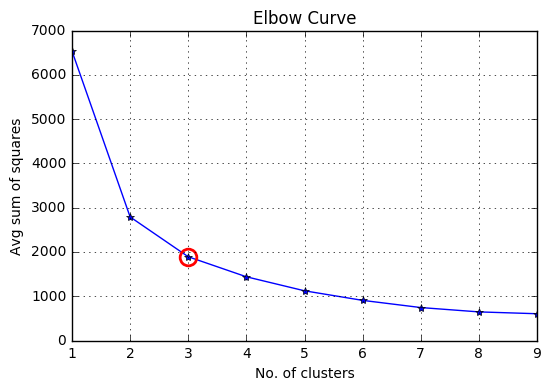

In [33]:
point_id = 2
# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSumSquare, 'b*-')
ax.plot(K[point_id], avgWithinSumSquare[point_id], marker='o', markersize=12, 
      markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('No. of clusters')
plt.ylabel('Avg sum of squares')
tt = plt.title('Elbow Curve')

Tomando como referencia el gráfico, buscaremos 3 clusters

### Clustering de los paises en bases a sus indicadores de desarrollo

Algoritmo: K-means

In [34]:
km = KMeans(3, init='k-means++', random_state = 3425) # initialize
km.fit(df.values)
df['countrySegment'] = km.predict(df.values)
df[:5]

,lifeMale,lifeFemale,infantMortality,GDPperCapita,countrySegment
0,45.0,46.0,154.0,2848.0,1
1,68.0,74.0,32.0,863.0,1
2,67.5,70.3,44.0,1531.0,1
5,44.9,48.1,124.0,355.0,1
7,69.6,76.8,22.0,8055.0,0


Promedio de PBI por cada cluster encontrado

In [35]:
df.groupby('countrySegment').GDPperCapita.mean()

countrySegment
0    13800.586207
1     1624.538462
2    29681.625000
Name: GDPperCapita, dtype: float64

En base al PBI promedio, determinamos que el cluster 2 se llamará "Desarrollado", cluster 1 "Poco desarrollado", cluster 0 "En desarrollo" 

In [36]:
clust_map = {
    0:'Developing',
    1:'Under Developed',
    2:'Developed'
}

df.countrySegment = df.countrySegment.map(clust_map)
df[:10]

,lifeMale,lifeFemale,infantMortality,GDPperCapita,countrySegment
0,45.0,46.0,154.0,2848.0,Under Developed
1,68.0,74.0,32.0,863.0,Under Developed
2,67.5,70.3,44.0,1531.0,Under Developed
5,44.9,48.1,124.0,355.0,Under Developed
7,69.6,76.8,22.0,8055.0,Developing
8,67.2,74.0,25.0,354.0,Under Developed
9,75.4,81.2,6.0,20046.0,Developing
10,73.7,80.1,6.0,29006.0,Developed
11,66.5,74.5,33.0,321.0,Under Developed
12,70.5,77.1,14.0,12545.0,Developing


Analizamos el PBI vs mortalidad infantil en cada cluster

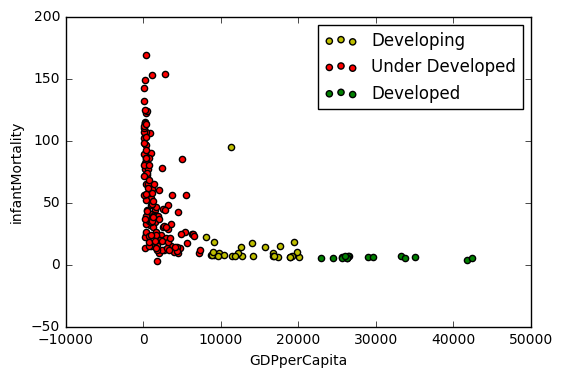

In [37]:
d_color = {
    'Developing':'y',
    'Under Developed':'r',
    'Developed':'g'
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.countrySegment == clust].plot(kind='scatter', x='GDPperCapita', y='infantMortality', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

Cuando el PBI es bajo la mortalidad infantil es alta.

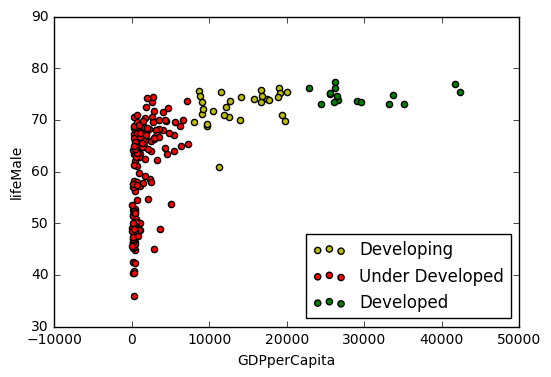

In [38]:
fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.countrySegment == clust].plot(kind='scatter', x='GDPperCapita', y='lifeMale', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="lower right")

Esperanza de vida se incrementa mientras el pais está más desarrollado

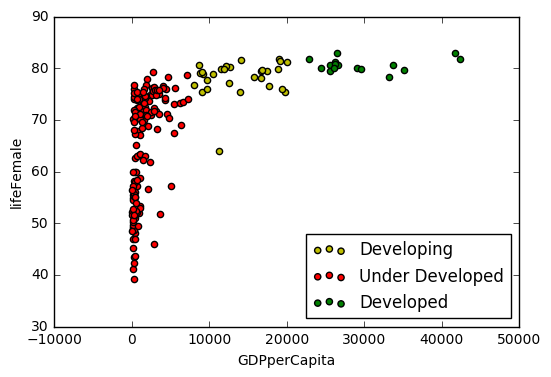

In [39]:
fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.countrySegment == clust].plot(kind='scatter', x='GDPperCapita', y='lifeFemale', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="lower right")

Esperanza de vida se incrementa mientras el pais está más desarrollado